## Support Vector Machine(SVM)

### 알고리즘의 원리
- 클래스 간의 분리를 최대화하는 방향으로 결정 경계를 생성
- 선형적으로 구분 가능한 데이터를 분류할 때 사용.

![](https://velog.velcdn.com/images/newnew_daddy/post/cee82bb1-c3df-4a8c-a170-0ef77e86336d/image.png)

- **초평면(Hyperplane)**:
    - 클래스 간의 결정 경계.

- **마진(Margin)**:
  - 결정 경계와 데이터 포인트 간의 거리.
  - 마진이 클수록 모델의 일반화 성능이 향상된다.

- **서포트 벡터(Support Vectors)**:
    - 결정 경계를 형성하는 데 중요한 역할을 하는 데이터 포인트들
    - 서포트 벡터는 마진의 가장자리에 위치하며, 결정 경계의 위치를 정의하는 데 사용된다.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    classification_report
)

df = pd.read_csv('./dataset/svm.csv')

df.head(), df.shape

(   Age  EstimatedSalary  Purchased
 0   19            19000          0
 1   35            20000          0
 2   26            43000          0
 3   27            57000          0
 4   19            76000          0,
 (400, 3))

In [13]:
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.svm import SVC
"""
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- kernel : 주요 커널 함수 (‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’)
- C(정규화 파라미터) : SVM은 정규화 파라미터 C를 사용하여 마진 최대화와 오차 최소화 사이의 균형을 조절한다. 
                   C가 클수록 오차 허용을 줄이고, 작은 마진을 선택할 가능성이 높아진다. 
                   반면, C가 작을수록 오차를 더 허용하고, 큰 마진을 유지하려고 한다.
"""

svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [24]:
y_pred = svc.predict(X_test)

yt  = pd.DataFrame(y_test, columns=['test'])
yp  = pd.DataFrame(y_pred, columns=['pred'])

pd.concat([yt, yp], axis=1)

,test,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


In [36]:
## 모델 정확도 평가

print("Train : ", svc.score(X_train, y_train))
print("Test : ", svc.score(X_test, y_test))

Train :  0.8233333333333334
Test :  0.9


In [37]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print('-'*50)

# 분류 리포트 출력
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.90
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[[66  2]
 [ 8 24]]


0.9

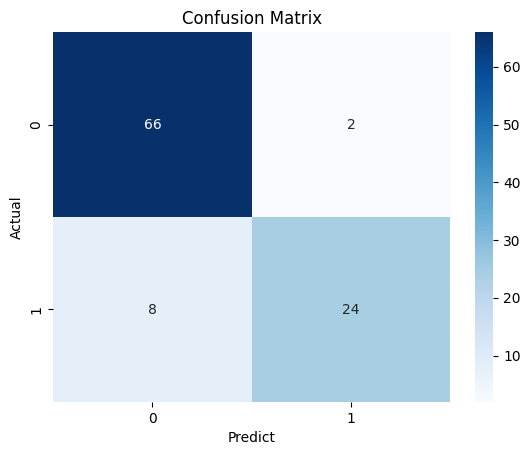

In [42]:
## Training Set 시각화

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [16]:
## Test Set 시각화

X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
    
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 비선형 SVM (Kernel SVM)

![](https://velog.velcdn.com/images/newnew_daddy/post/89f3f96d-23a9-4689-a4ec-1f0072ecb8ff/image.png)

- 비선형 데이터의 경우 입력 공간을 고차원 특징 공간으로 매핑한다. 이로 인해 선형적으로 구분할 수 없는 데이터도 선형적으로 구분할 수 있게 된다.
- 

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/svm.csv')

df.head(), df.shape

(   Age  EstimatedSalary  Purchased
 0   19            19000          0
 1   35            20000          0
 2   26            43000          0
 3   27            57000          0
 4   19            76000          0,
 (400, 3))

In [2]:
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, y_train)

SVC(random_state=0)

In [7]:
y_pred = svc.predict(X_test)

yt  = pd.DataFrame(y_test, columns=['test'])
yp  = pd.DataFrame(y_pred, columns=['pred'])

pd.concat([yt, yp], axis=1)

,test,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,1
98,1,1


In [14]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print('-'*50)

# 분류 리포트 출력
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.93
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



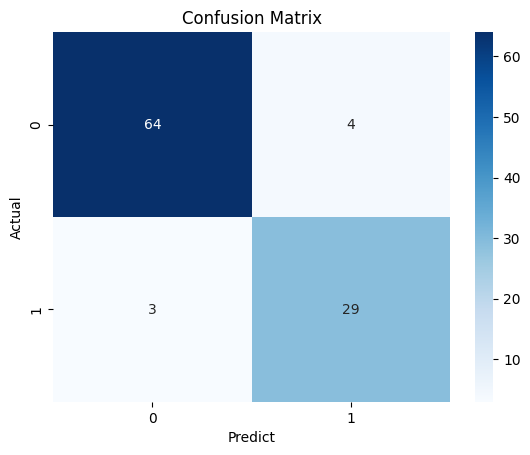

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/var/folders/5t/b4f76j1158ld50h5rb8dx4b00000gn/T/ipykernel_47058/2620998925.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


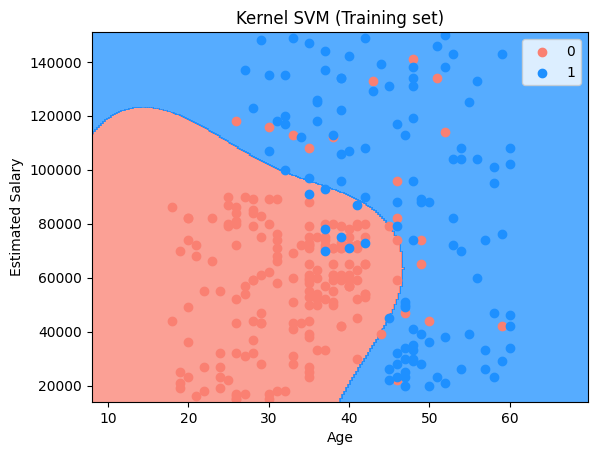

In [15]:
## Training Set 시각화

from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
## Test Set 시각화

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()